Data points of citibike dataset:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3H, Name: one, Length: 248, dtype: int64
Number of data points:(248,)

Data type of one data point in the dataset:<class 'numpy.int64'>




min:2015-08-01 00:00:00
max:2015-08-31 21:00:00


C:\Users\abhin\AppData\Local\Programs\Python\Python310\lib\site-packages\mglearn\datasets.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_resampled = data_starttime.resample("3h").sum().fillna(0)


ValueError: Invalid format string

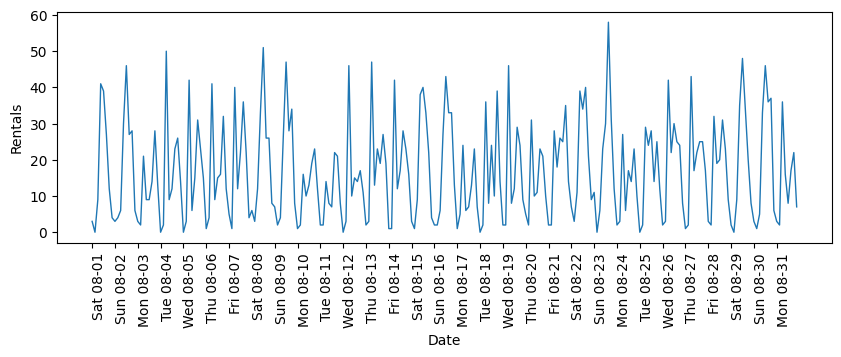

In [40]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

citibikes = mglearn.datasets.load_citibike()
print("Data points of citibike dataset:\n{}".format(citibikes))
print("Number of data points:{}\n".format(citibikes.shape))
print("Data type of one data point in the dataset:{}\n\n\n\n".format(type(citibikes[0])))

plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibikes.index.min(), end=citibikes.index.max(), freq='D')

print("min:{}".format(citibikes.index.min()))
print("max:{}".format(citibikes.index.max()))

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibikes, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

y = citibikes.values
X = citibikes.index[0].strftime("%s").astype(np, int).reshape(-1, 1)

print(X)

def eval_features(features, target, regressor):
    n_train = 180
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Score of regressor:{}\n".format(regressor.score(X_test, y_test)))
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)
    
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, '-',label="training set")
    plt.plot(range(n_train, n_train+len(y_test)), y_test, '-', label="test set")
    plt.plot(range(n_train), y_pred_train, '--', label="predicted train result")
    plt.plot(range(n_train, n_train+len(y_test)), y_pred_test, '--', label="predicted test result")
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    plt.legend(loc=(1.01, 0))

#Yields a score of -0.04
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_features(X, y, reg)

#Yields a score of 0.60
X_hour = citibikes.index.hour.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

#Yields a score of 0.84
X_hour_week = np.hstack([citibikes.index.dayofweek.reshape(-1, 1),
 citibikes.index.hour.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

#Yields a score of 0.13
eval_on_features(X_hour_week, y, LinearRegression())

#Yields a score of 0.62
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
eval_on_features(X_hour_week_onehot, y, Ridge())

#Yields a score of 0.85
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
 include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)


hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")
